# TP final de IAA

## Info Reelevante:
https://archive.ics.uci.edu/dataset/1/abalone

https://es.wikipedia.org/wiki/Haliotis


## Traer el dataset (una de dos formas)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

Correr uno de los 2 siguientes bloques de codigo. Es para cargar la data.
Ya sea de local o desde el repositorio online. Uno tiene que funcionar.

In [4]:
# esto a veces falla, si no funciona, se cargan los archivos locales...
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [2]:
# Si no funciona se pueden cargar los archivos locales
#Cargar archivos locales

column_names = [
    "Sex", "Length", "Diameter", "Height", "Whole_weight",
    "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"
    ]


data = pd.read_csv("abalone.data", names=column_names)

atributos = [
    "Sex", "Length", "Diameter", "Height", "Whole_weight",
    "Shucked_weight", "Viscera_weight", "Shell_weight"
    ]


X = data[atributos]
y = data["Rings"]



Vamos a categorizar los targets de manera que queden clases balanceadas...

In [5]:
# Clasificando los targets en categorias.
bins = [0, 8, 10, 29]
labels = ['clase0', 'clase1', 'clase2']
y = pd.cut(y["Rings"], bins=bins, labels=labels)

Ahora separamos en train-test antes de hacer nada.

In [6]:
# Separo en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42)

In [ ]:
atributos = [
    "Sex", "Length", "Diameter", "Height", "Whole_weight",
    "Shucked_weight", "Viscera_weight", "Shell_weight"
    ]

# plt.scatter(X,y, s=2, label='Datos Medidos')
for atributo in atributos:
    X_train[atributo].hist()
    plt.xlabel(atributo)
    plt.show()

Encontramos un par de outliers en el dataset...
los vamos a sacar.

In [8]:
# hay un par de outliers que hacen que el histograma de feo para Heigth
# X_train[X_train["Height"] < 0.5].Height.hist()

X_train[X_train["Height"] > 0.5]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335


In [9]:
# Sacamos los 2 outliers.
outliers_heigth = [1417, 2051]

X_train = X_train[X_train["Height"] < 0.5]
y_train = y_train.drop(outliers_heigth, inplace=False)

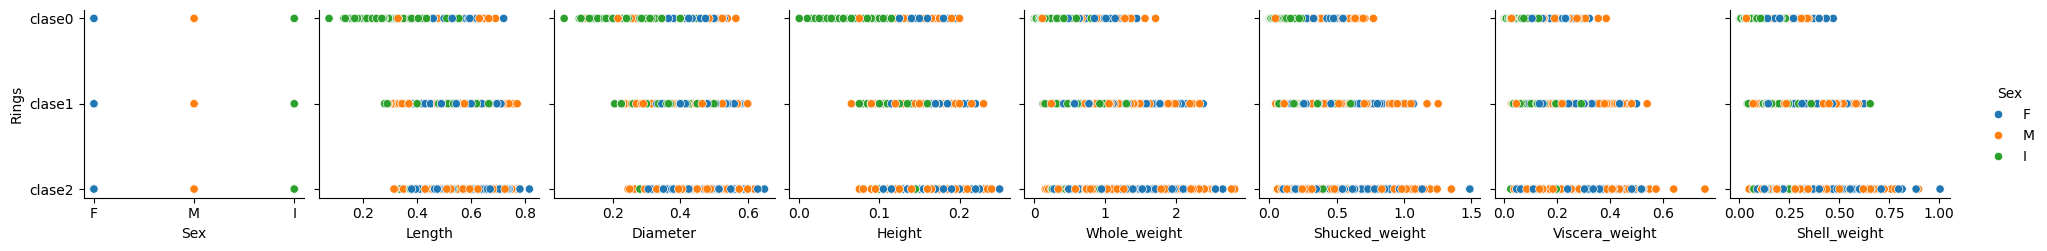

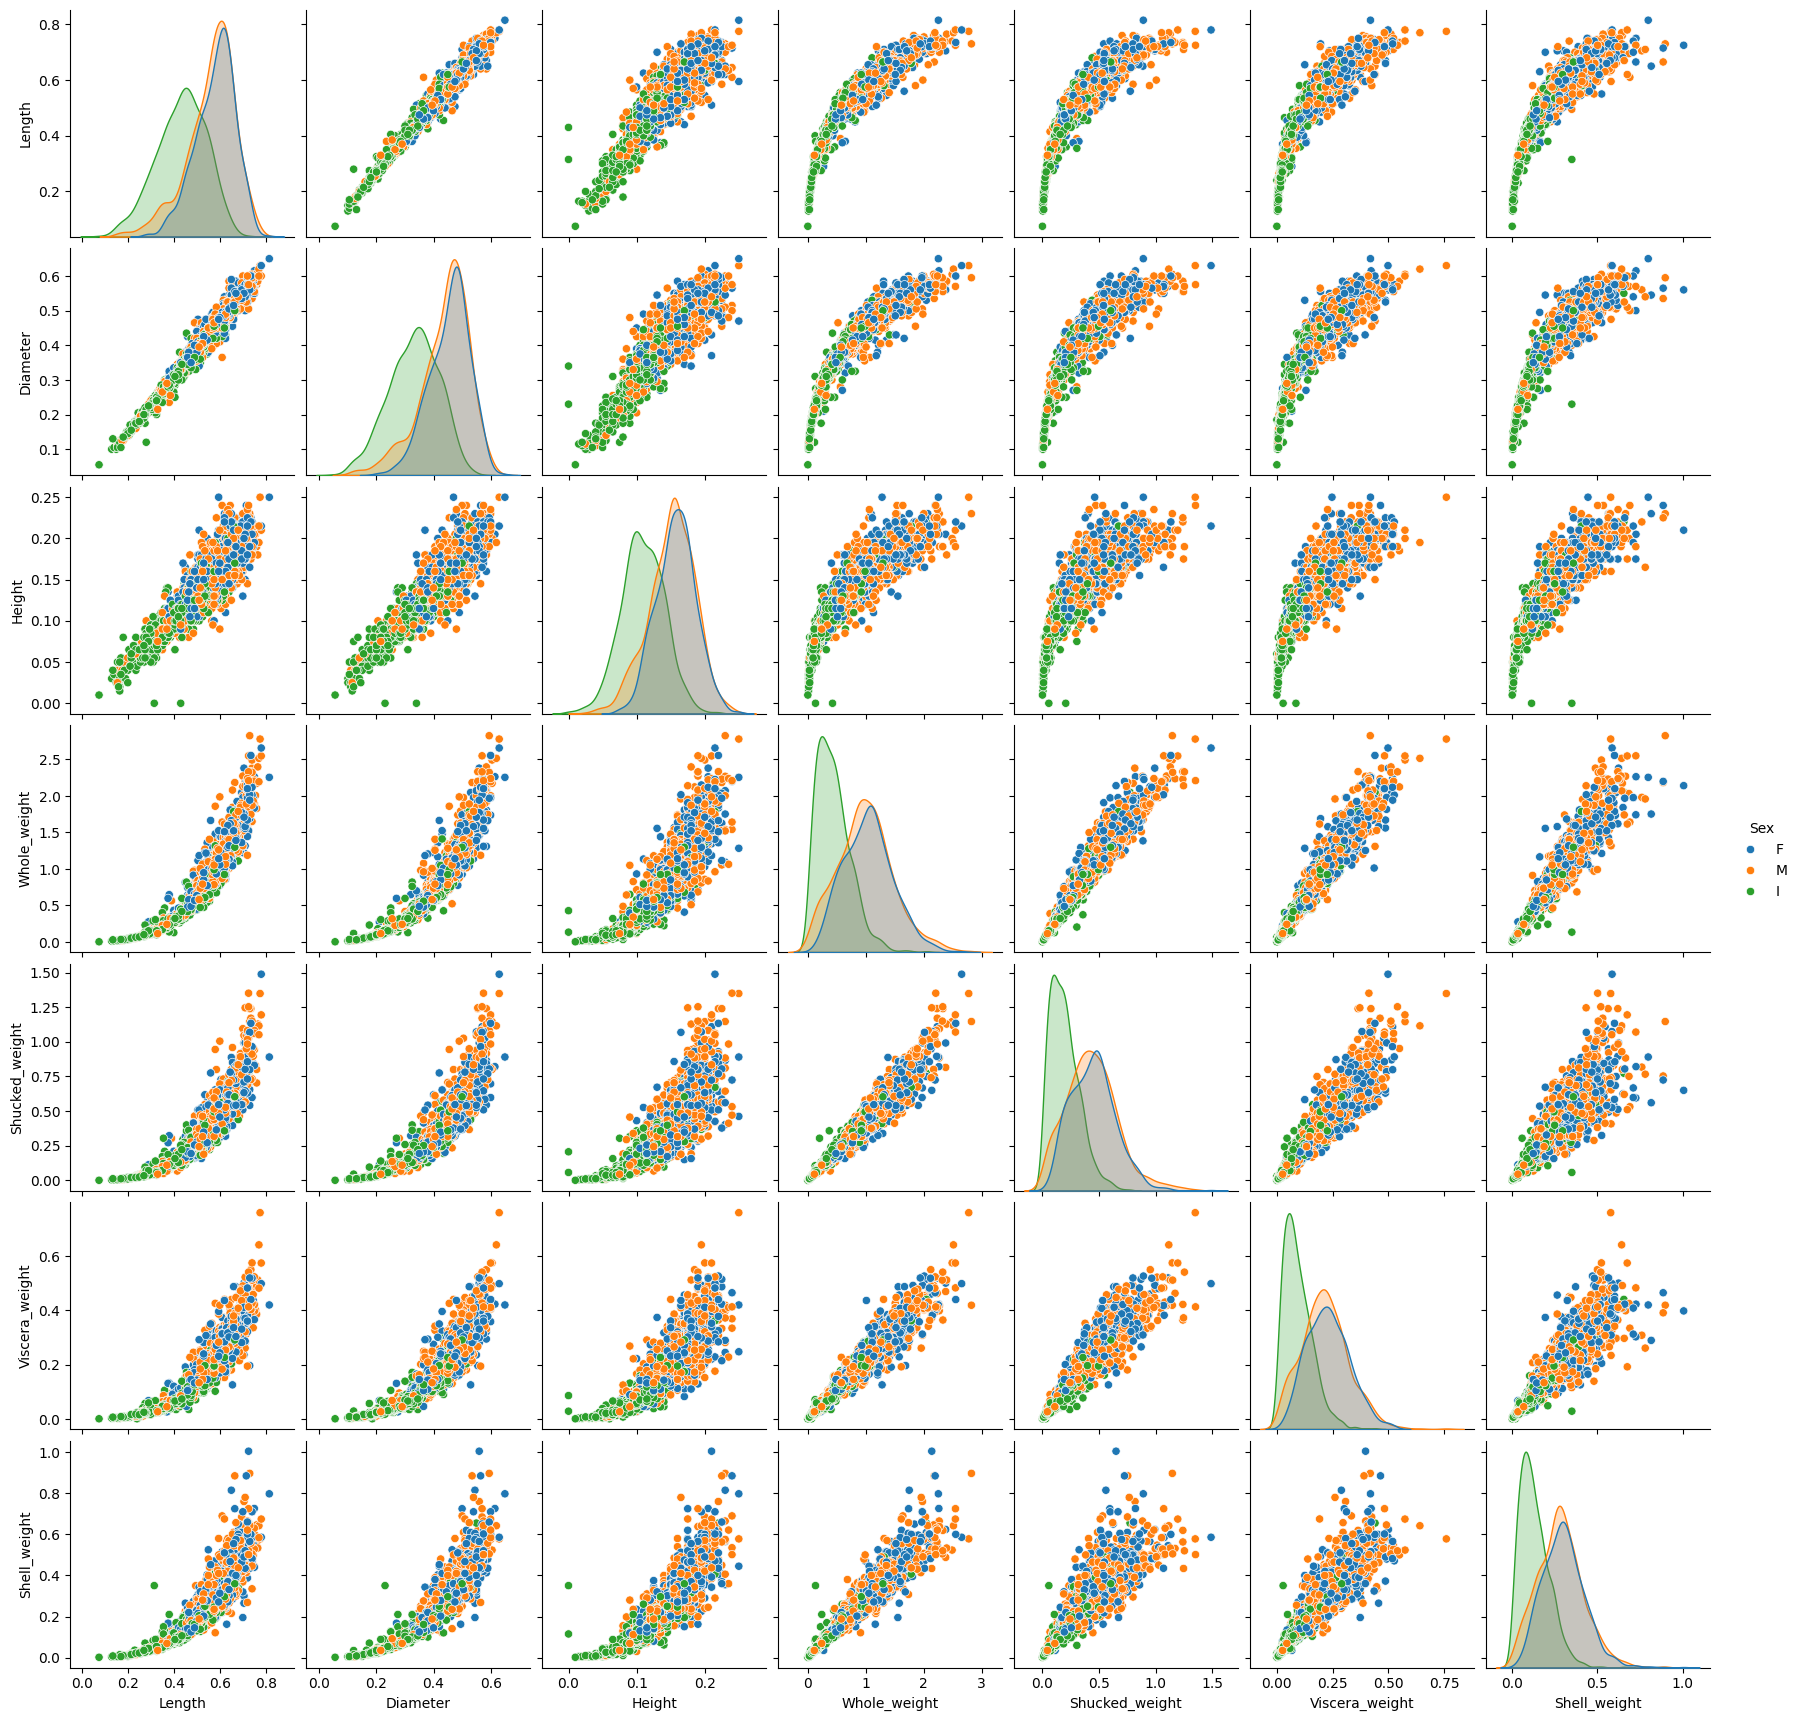

In [ ]:
train = pd.merge(X_train, y_train, left_index=True, right_index=True)

sns.pairplot(train, y_vars='Rings', x_vars=train.columns[:-1], hue="Sex")  # Excluir 'Rings' de las variables X

sns.pairplot(train, hue="Sex")

In [ ]:
# train.groupby(["Rings", "Sex"]).Sex.count()
# train.columns

In [ ]:
# infant_train = train[train["Sex"]=="I"]

# sns.pairplot(infant_train)

Vamos a probar armar un primer modelo para ver que pasa...

[Text(0.45601851851851855, 0.9285714285714286, 'x[6] <= 0.155\ngini = 0.666\nsamples = 3130\nvalue = [1050, 979, 1101]'),
 Text(0.19791666666666666, 0.7857142857142857, 'x[6] <= 0.097\ngini = 0.38\nsamples = 973\nvalue = [747, 155, 71]'),
 Text(0.06481481481481481, 0.6428571428571429, 'x[6] <= 0.042\ngini = 0.216\nsamples = 533\nvalue = [469, 50, 14]'),
 Text(0.018518518518518517, 0.5, 'x[5] <= 0.032\ngini = 0.012\nsamples = 166\nvalue = [165, 1, 0]'),
 Text(0.009259259259259259, 0.35714285714285715, 'gini = 0.0\nsamples = 156\nvalue = [156, 0, 0]'),
 Text(0.027777777777777776, 0.35714285714285715, 'x[5] <= 0.033\ngini = 0.18\nsamples = 10\nvalue = [9, 1, 0]'),
 Text(0.018518518518518517, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.037037037037037035, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(0.1111111111111111, 0.5, 'x[4] <= 0.096\ngini = 0.295\nsamples = 367\nvalue = [304, 49, 14]'),
 Text(0.07407407407407407, 0.35714285

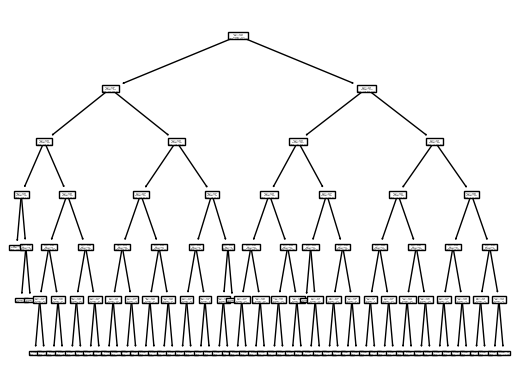

In [ ]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42)

atributos_sexless = [
    "Length", "Diameter", "Height", "Whole_weight",
    "Shucked_weight", "Viscera_weight", "Shell_weight"
    ]
X_train_sexless = X_train[atributos_sexless]
X_test_sexless = X_test[atributos_sexless]

clf.fit(X_train_sexless, y_train)

plot_tree(clf)

TRAIN


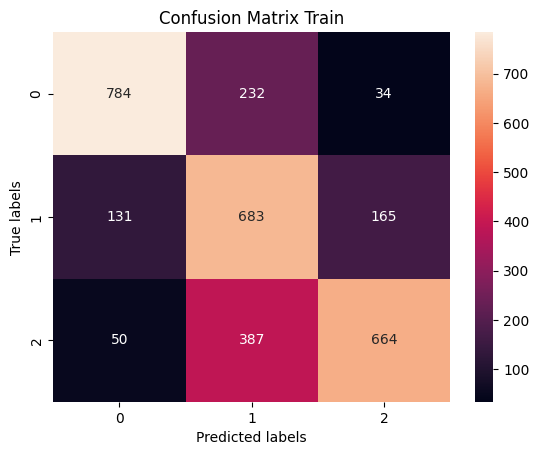

In [ ]:
y_train_pred_sexless = clf.predict(X_train_sexless)
y_test_pred_sexless = clf.predict(X_test_sexless)

print("TRAIN")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, y_train_pred_sexless), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Train');
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);


TEAST


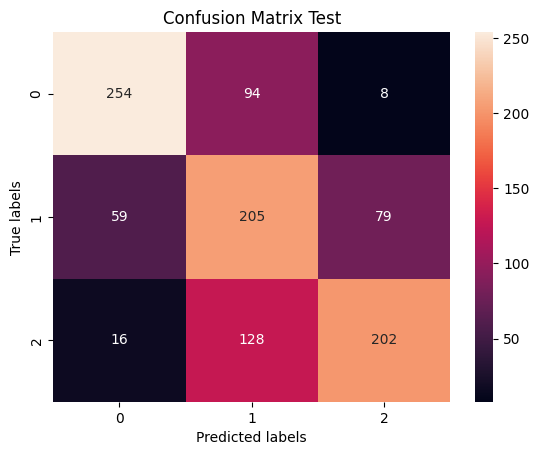

In [ ]:
print("\nTEAST")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_test_pred_sexless), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Test'); # ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

In [ ]:
(X_train["Diameter"]/X_train["Length"]).describe()

count    3130.000000
mean        0.775626
std         0.032993
min         0.428571
25%         0.756757
50%         0.776699
75%         0.795276
max         0.962963
dtype: float64

La idea ahora es probar con una regresion logistica...

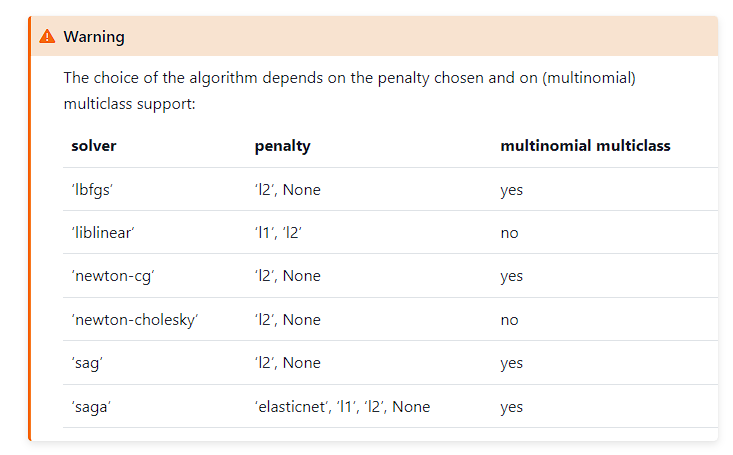



TRAIN


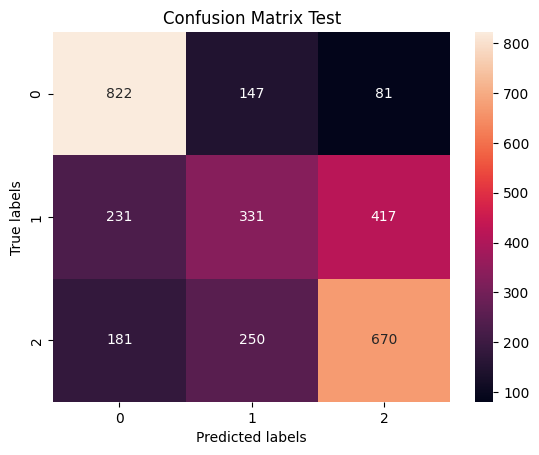

0.5824281150159745


In [11]:
clf_lg = LogisticRegression(penalty = None, random_state=42)

clf_lg.fit(X_train[["Length", "Whole_weight"]], y_train)

y_train_pred_lg = clf_lg.predict(X_train[["Length", "Whole_weight"]])

print("\nTRAIN")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, y_train_pred_lg), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Test');
plt.show()

print(accuracy_score(y_train, y_train_pred_lg))

# Queremos probar agregando el sexo como feature, para mejorar *perfonmance*


TRAIN


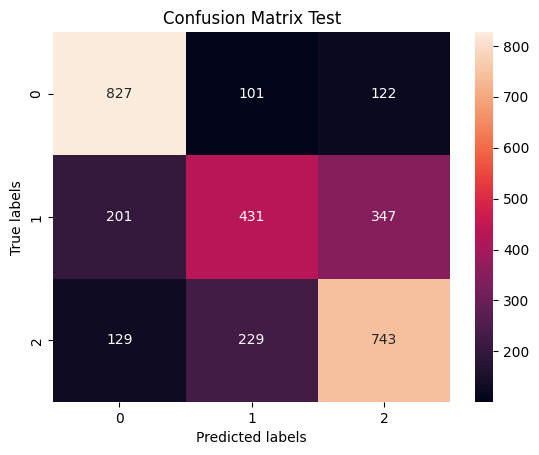

0.639297124600639


In [33]:
# Como los modelos fallan con categorias, vamos a agregar columnas binarias con
# 1 solo en las filas de la categorias correspondiente...

pipe_lg = Pipeline([
    ("OneHot", OneHotEncoder()),
    ("lg", LogisticRegression(penalty = "l1", solver="saga" , random_state=42))
])

pipe_lg.fit(X_train[["Length", "Whole_weight", "Sex"]], y_train)

y_train_pred_hot_lg = pipe_lg.predict(X_train[["Length", "Whole_weight", "Sex"]])

print("\nTRAIN")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, y_train_pred_hot_lg), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Test');
plt.show()

print(accuracy_score(y_train, y_train_pred_hot_lg))

Esto No esta ajustando bien... El encoder esta aplicado a todas las columnas


TRAIN


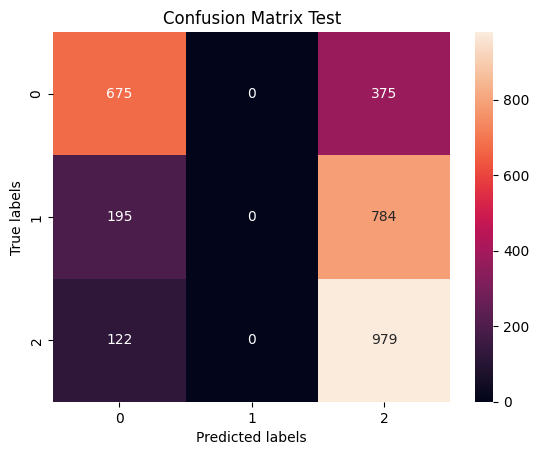

0.5284345047923322


In [35]:
# Como los modelos fallan con categorias, vamos a agregar columnas binarias con
# 1 solo en las filas de la categorias correspondiente...

# Para esto hay que codear un transformer que solo toque columnas deseadas.
# Esto es una simplificacion de un ej de la doc:
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
categorical_feature = ["Sex"]
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_feature),
    ]
)
pipe_lg = Pipeline([
    ("preprocessor", preprocessor),
    ("lg", LogisticRegression(penalty = None, solver="lbfgs" , random_state=42)) # Esto esta distinto a lo de arriba
                     ])

pipe_lg.fit(X_train[["Length", "Whole_weight", "Sex"]], y_train)

y_train_pred_hot_lg = pipe_lg.predict(X_train[["Length", "Whole_weight", "Sex"]])

print("\nTRAIN")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, y_train_pred_hot_lg), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Test');
plt.show()

print(accuracy_score(y_train, y_train_pred_hot_lg))


TEST


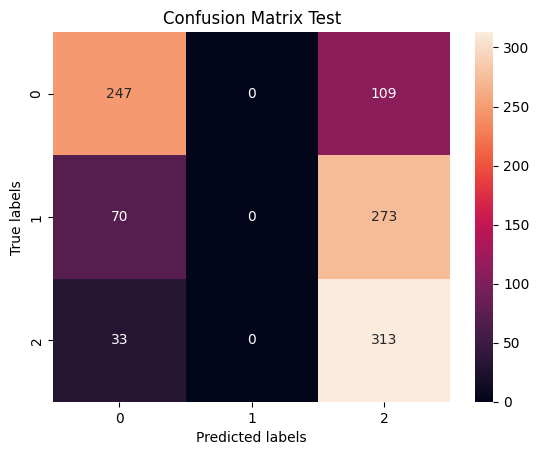

0.5358851674641149


In [37]:
y_test_pred_hot_lg = pipe_lg.predict(X_test[["Length", "Whole_weight", "Sex", "Height"]])


print("\nTEST")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_test_pred_hot_lg), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Test');
plt.show()

print(accuracy_score(y_test, y_test_pred_hot_lg))